In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\zzuge\\OneDrive\\바탕 화면\\학부연구생\\mydata.xlsx')

In [3]:
df

,Date,count,age65up,Delta_count,Omicron_count,Delta_prop,Omicron_prop,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,...,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential,death,period
0,2020-02-15,0,0,0,0,0.0,0.0,-4,0,3,...,1,3,-8,0,2,-4,1,3,0,1
1,2020-02-16,2,2,0,0,0.0,0.0,-11,0,-31,...,-3,4,-15,0,-33,-16,-3,4,1,1
2,2020-02-17,0,0,0,0,0.0,0.0,-7,-6,-17,...,0,5,-9,-6,-17,-7,0,5,0,1
3,2020-02-18,2,0,0,0,0.0,0.0,-1,-3,-5,...,2,2,1,-2,-3,-1,2,2,0,1
4,2020-02-19,34,5,0,0,0.0,0.0,-5,-1,14,...,1,2,-7,-1,9,-5,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2022-04-07,224761,30541,0,0,0.0,0.0,-6,8,23,...,7,1,-15,2,19,-17,3,3,29,5
783,2022-04-08,205302,29193,0,0,0.0,0.0,-5,14,28,...,6,1,-13,6,28,-13,1,3,0,5
784,2022-04-09,185526,29472,0,0,0.0,0.0,0,18,42,...,-3,2,-10,8,42,-12,-7,2,0,5
785,2022-04-10,164454,26131,0,0,0.0,0.0,9,14,61,...,-5,1,0,3,74,-8,-8,0,0,5


In [4]:
df = df[['Date', 'count', 'seoul_grocery_pharmacy']]

In [5]:
df = df.iloc[:600, :]
df_date = df.set_index('Date')
df_date = df_date.resample('W-Fri').sum() # 주간 합계산 
df_date

,count,seoul_grocery_pharmacy
Date,,
2020-02-21,128,-17
2020-02-28,1860,-65
2020-03-06,4256,-55
2020-03-13,1685,-44
2020-03-20,611,-18
...,...,...
2021-09-10,12037,200
2021-09-17,12358,262
2021-09-24,13000,297


<Figure size 864x576 with 0 Axes>

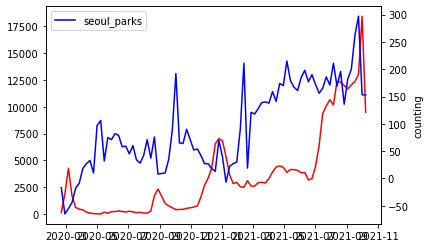

In [7]:
plt.figure(figsize = (12, 8))
fig, ax = plt.subplots()
ax.plot(df_date['count'], color = 'red', label = 'count')
plt.legend()

ax1 = ax.twinx()
ax1.plot(df_date['seoul_grocery_pharmacy'], color = 'blue', label = 'seoul_parks')
plt.legend()
plt.xlabel('Date')
plt.ylabel('counting')

plt.show()

In [8]:
df

,Date,count,seoul_grocery_pharmacy
0,2020-02-15,0,0
1,2020-02-16,2,0
2,2020-02-17,0,-6
3,2020-02-18,2,-3
4,2020-02-19,34,-1
...,...,...,...
595,2021-10-02,2220,26
596,2021-10-03,2057,42
597,2021-10-04,1650,35
598,2021-10-05,1555,26


In [9]:

import statsmodels.api as sm

cc = sm.tsa.stattools.ccf(df['count'], df['seoul_grocery_pharmacy'] ,adjusted = False)

In [10]:
result = []

for i in range(1, 13):
    c1 = cc[50* (i-1) : 50 * i]
    result.append(c1)
    

In [11]:
result = pd.DataFrame(result);result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.457513,0.455724,0.466827,0.461096,0.463702,0.486369,0.491750,0.485031,0.480329,0.507671,...,0.447872,0.437243,0.437741,0.439268,0.460236,0.465234,0.468870,0.467159,0.452590,0.451791
1,0.456521,0.473711,0.474737,0.473337,0.469448,0.456251,0.458265,0.464128,0.481524,0.477897,...,0.412442,0.416710,0.421912,0.435828,0.434960,0.425962,0.423129,0.409542,0.409869,0.406174
2,0.417279,0.413785,0.413488,0.402571,0.382455,0.382743,0.383656,0.388464,0.389927,0.383281,...,0.292538,0.291758,0.299596,0.296871,0.292050,0.283938,0.273520,0.274130,0.267765,0.274451
3,0.275531,0.271053,0.256837,0.246401,0.247237,0.235034,0.239357,0.236907,0.229550,0.219772,...,0.090241,0.100749,0.095677,0.092191,0.083507,0.077701,0.077910,0.074168,0.081917,0.077748
4,0.073599,0.061925,0.055416,0.054240,0.046697,0.058378,0.055704,0.047801,0.031824,0.022473,...,-0.113716,-0.120089,-0.125904,-0.139255,-0.152308,-0.155234,-0.160097,-0.151511,-0.157777,-0.160238
5,-0.168536,-0.176187,-0.178472,-0.181848,-0.170150,-0.174546,-0.170203,-0.177612,-0.188854,-0.192605,...,-0.171067,-0.165328,-0.167446,-0.178411,-0.178681,-0.172637,-0.159663,-0.158333,-0.149246,-0.154992
6,-0.172395,-0.164654,-0.156391,-0.140391,-0.138079,-0.133580,-0.141044,-0.155723,-0.151195,-0.139469,...,-0.066228,-0.071573,-0.083245,-0.083413,-0.073975,-0.063588,-0.068238,-0.068286,-0.079024,-0.100645
7,-0.100244,-0.092605,-0.083102,-0.081947,-0.082358,-0.091348,-0.106345,-0.116840,-0.117148,-0.101124,...,-0.174208,-0.185004,-0.191309,-0.188025,-0.182203,-0.172329,-0.162894,-0.162355,-0.175176,-0.178316
8,-0.168486,-0.156145,-0.155111,-0.149101,-0.143811,-0.151273,-0.152019,-0.148317,-0.139417,-0.138735,...,-0.124620,-0.121512,-0.121076,-0.114943,-0.113156,-0.108323,-0.110444,-0.114161,-0.116727,-0.119275
9,-0.111790,-0.103248,-0.099261,-0.106553,-0.114844,-0.115351,-0.116580,-0.112193,-0.113646,-0.108714,...,-0.180852,-0.185729,-0.178273,-0.185583,-0.192772,-0.199012,-0.203059,-0.208402,-0.217204,-0.212524


In [13]:
result.to_csv('C:\\Users\\zzuge\\seoul_grocery_pharmacy.csv')
